In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
data = pd.get_dummies(data, drop_first=True)
x=data.drop('price',axis=1)
y=data['price']

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
models = {"Ridge": Ridge(alpha=1.0),
          "Lasso": Lasso(alpha=1.0),
          "ElasticNet": ElasticNet (alpha=1.0, l1_ratio=0.5)}

In [7]:
result= {}
for name,model in models.items():
    pipeline = Pipeline([
        ('poly',PolynomialFeatures(degree=2)),
                         ('regressor',model)
    ])

In [8]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('regressor', ElasticNet())])

In [9]:
predictions = pipeline.predict(x_test)

In [10]:
mse=mean_squared_error(y_test,predictions)
r2score=r2_score(y_test,predictions)

In [11]:
result[name]={'MSE': mse, 'R2 Score': r2score}

In [12]:
print('Name: A.Jannathul Shaban')
print('Reg. No: 212225220043')
for model_name,metrics in result.items():
    print(f"{model_name} -Mean Squared Error: {metrics['MSE']:.2f},R2_Score: {metrics['R2 Score']:.2f}")

Name: A.Jannathul Shaban
Reg. No: 212225220043
ElasticNet -Mean Squared Error: 1.33,R2_Score: -0.07


In [13]:
result_df = pd. DataFrame (result). T
result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'Model'}, inplace=True)

In [14]:
plt.figure(figsize= (12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(array([0]), [Text(0, 0, 'ElasticNet')])

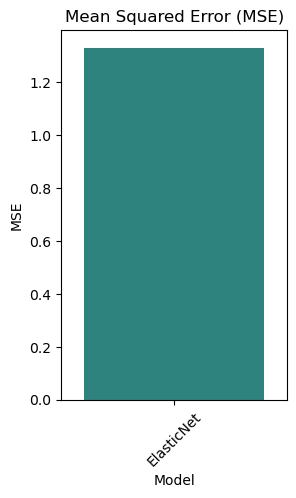

In [15]:
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=result_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

(array([0]), [Text(0, 0, 'ElasticNet')])

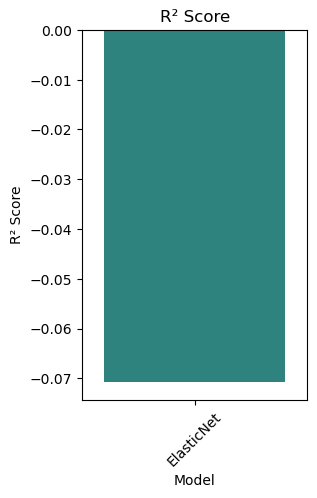

In [16]:
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=result_df, palette='viridis')
plt.title('R² Score')
plt.ylabel('R² Score')
plt.xticks (rotation=45)

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>